# Задание 5

In [11]:
%matplotlib inline

import random
import math
from itertools import islice
from typing import Generator, Tuple, List, Callable

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
from scipy.special import hermite
import pandas as pd


sns.set(style='whitegrid')

## Упражнение 1.

Найти максимальное и минимальное значения функции
$$
y = \sin{x} - \frac{1}{2} \cos{2 x} + \frac{1}{3} \cos{3 x}, - \pi < x < \pi
$$

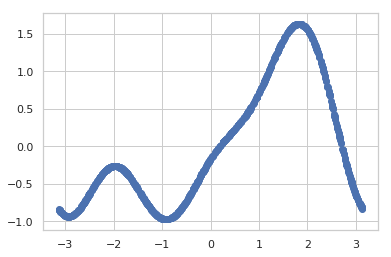

In [6]:
n_points = 10 ** 3


def func(x: float) -> float:
    return math.sin(x) - math.cos(2 * x) / 2 + math.cos(3 * x) / 3 


xs = [random.uniform(-math.pi, math.pi) for _ in range(n_points)]
ys = [func(x) for x in xs]
points = zip(xs, ys)

plt.scatter(x=xs, y=ys)

In [7]:
sorted_points = sorted(points, key=lambda p: p[1])

In [8]:
sorted_points[0]

(-0.9251086227006278, -0.9720102061123557)

In [9]:
sorted_points[-1]

(1.8196737635977707, 1.6349081639370704)

## Упражнение 2

In [13]:
def w(n: int, l: int, m: int) -> Callable[[float, float], float]:
    if n == 1:
        if l == 0:
            if m == 0:
                return lambda r, theta: r**2 * np.exp(-2*r) * np.sin(theta) / np.pi
    elif n == 2:
        if l == 0:
            if m == 0:
                return lambda r, theta: r**2/2 * (1 - r**2/2) * np.exp(-r) * np.sin(theta) / (4*np.pi)
        if l == 1:
            if m == 0:
                return lambda r, theta: r**4 * np.exp(-r) * np.cos(theta)**2 * np.sin(theta) / (32*np.pi)
            elif m == 1:
                return lambda r, theta: r**4 * np.exp(-r) * np.sin(theta)**3 / (64*np.pi)

In [20]:
n_points = 10 ** 5


def compute_minimax(
        func: Callable[[float, float], float],
        a: Tuple[Tuple[float, float], Tuple[float, float]]
) -> Tuple[Tuple[float, float, float], Tuple[float, float, float]]:
    points = [(
        random.uniform(a[0][0], a[0][1]),
        random.uniform(a[1][0], a[1][1]),
    ) for _ in range(n_points)]

    pairs = sorted([(p, func(p[0], p[1])) for p in points], key=lambda x: x[1])

    x = np.linspace(a[0][0], a[0][1], 1000)
    y = np.linspace(a[1][0], a[1][1], 1000)
    xx, yy = np.meshgrid(x, y)
    z = func(xx, yy)

    plt.figure(figsize=(15, 10))
    cont = plt.contour(x, y, z, levels=15)
    plt.scatter(*pairs[0][0], label='min', color='red', s=100)
    plt.scatter(*pairs[-1][0], label='max', color='blue', s=100)
    plt.clabel(cont)
    plt.legend()
    plt.grid()
    plt.show()

    return (
        (pairs[0][0][0], pairs[0][0][1], pairs[0][1]),
        (pairs[-1][0][0], pairs[-1][0][1], pairs[-1][1]),
    )


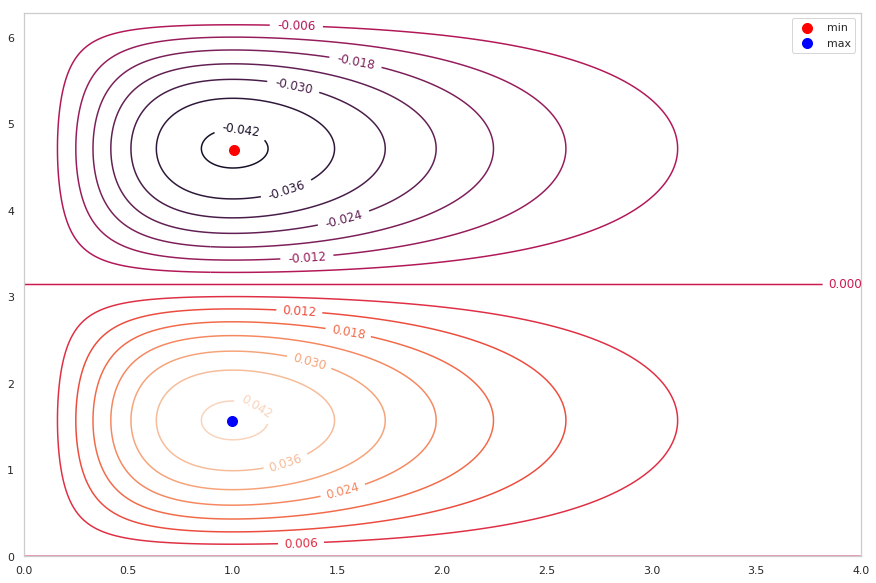

((1.0045067706941597, 4.699685892904477, -0.04307421062210205), (0.9963701001442433, 1.5646808214741574, 0.04307718407649909))


In [23]:
minimax = compute_minimax(w(1, 0, 0), ((0, 4), (0, 2 * math.pi)))
print(minimax)

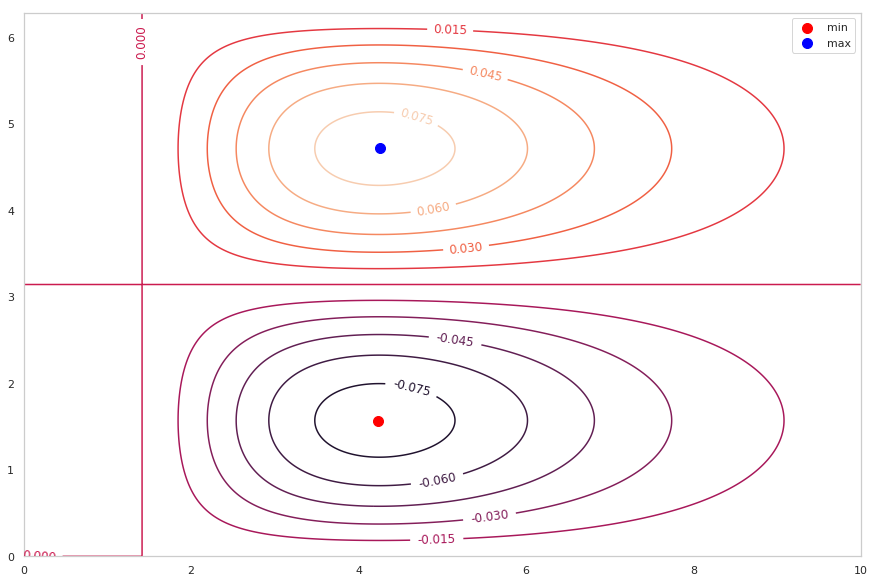

((4.237091929706258, 1.5586016755016425, -0.0823244676843779), (4.25889186711688, 4.715304936011068, 0.08233079396579707))


In [25]:
minimax = compute_minimax(w(2, 0, 0), ((0, 10), (0, 2 * math.pi)))
print(minimax)

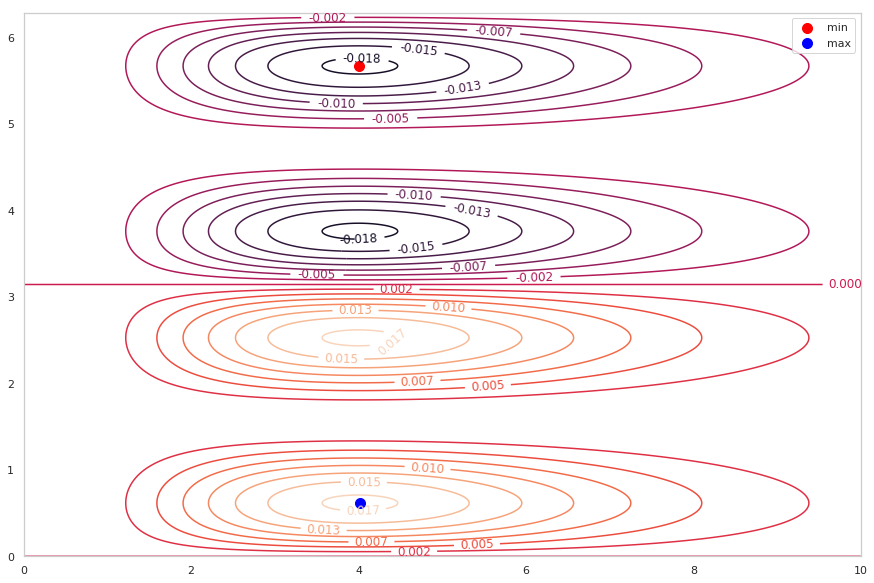

((4.00948822951396, 5.6692146848398295, -0.017951570647412794), (4.018471533207305, 0.6163168205426555, 0.017951094027254064))


In [27]:
minimax = compute_minimax(w(2, 1, 0), ((0, 10), (0, 2 * math.pi)))
print(minimax)

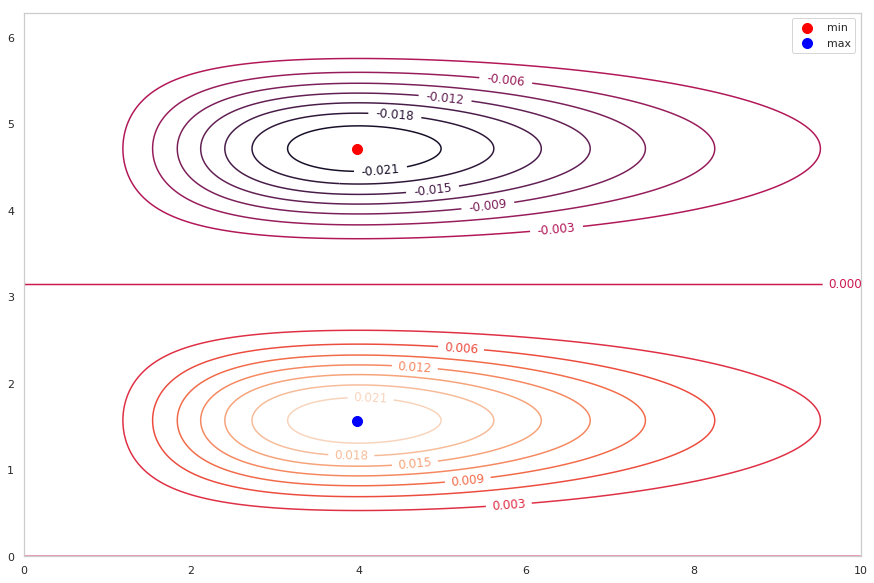

((3.986885940702858, 4.709557567258396, -0.023319412879352252), (3.9774211503085475, 1.5685888291705385, 0.023318533610137384))


In [28]:
minimax = compute_minimax(w(2, 1, 1), ((0, 10), (0, 2 * math.pi)))
print(minimax)

## Упражнение 5

In [35]:
n_points = 10 ** 5

r_0 = 50
c_0 = 1e-5
l_0 = 0.1

r = 1
l = 5
c = 25

s_r_min = 1
s_r_max = 10
s_c_min = 2e-7
s_c_max = 2e-6
s_l_min = 0.002
s_l_max = 0.02

In [37]:
def sigma_omega(sigma_r, sigma_c, sigma_l, n_points=100):
    points = np.random.random((n_points, 6))

    points[:, 0] = sigma_r * np.sqrt(-2 * np.log(points[:, 0]))
    points[:, 1] = sigma_c * np.sqrt(-2 * np.log(points[:, 1]))
    points[:, 2] = sigma_l * np.sqrt(-2 * np.log(points[:, 2]))

    points[:, 3] = 2*np.pi*points[:, 3]
    points[:, 4] = 2*np.pi*points[:, 4]
    points[:, 5] = 2*np.pi*points[:, 5]

    R = r_0 + points[:, 0] * np.cos(points[:, 3])
    C = c_0 + points[:, 1] * np.cos(points[:, 4])
    L = l_0 + points[:, 2] * np.cos(points[:, 5])
    omega = np.sqrt(1/(L*C) - (R/(2*L))**2)
    return np.mean(abs(omega - omega.mean())**2)


price = lambda sigmaR, sigmaC, sigmaL: r * r_0 / sigmaR + c * c_0 / sigmaC + l * l_0 / sigmaL


In [39]:
points = np.random.random((n_points, 3))
points[:, 0] = points[:, 0] * (s_r_max - s_r_min) + s_r_min
points[:, 1] = points[:, 1] * (s_c_max - s_c_min) + s_c_min
points[:, 2] = points[:, 2] * (s_l_max - s_l_min) + s_l_min
data_RLC = [(p, np.array([sigma_omega(*p, 500), price(*p)])) for p in points]

/Users/ikosolapov/.local/share/virtualenvs/monte-carlo-ZEOevUEx/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


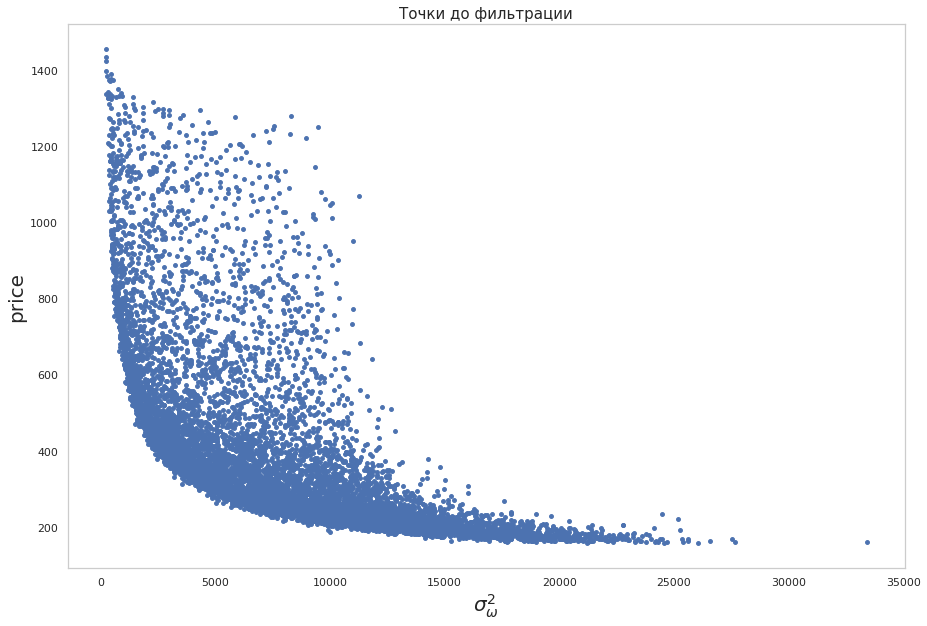

In [41]:
dispOmegas = [p[1][0] for p in data_RLC]
prices = [p[1][1] for p in data_RLC]
plt.figure(figsize=(15, 10))
plt.title('Точки до фильтрации', size=15)
plt.scatter(dispOmegas, prices, s=15)
plt.xlabel(r'$\sigma_{\omega}^2$', size=20)
plt.ylabel('price', size=20)
plt.grid()
plt.show()

In [42]:
s_data_RLC = sorted(data_RLC, key=lambda x: x[1][0])

ind = 0
while ind < len(s_data_RLC):
    mask = [True] * (ind+1) + [~((pair[1] > s_data_RLC[ind][1]).all()) for pair in s_data_RLC[ind+1:]]
    s_data_RLC = [val for val, b in zip(s_data_RLC, mask) if b]
    ind += 1

/Users/ikosolapov/.local/share/virtualenvs/monte-carlo-ZEOevUEx/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


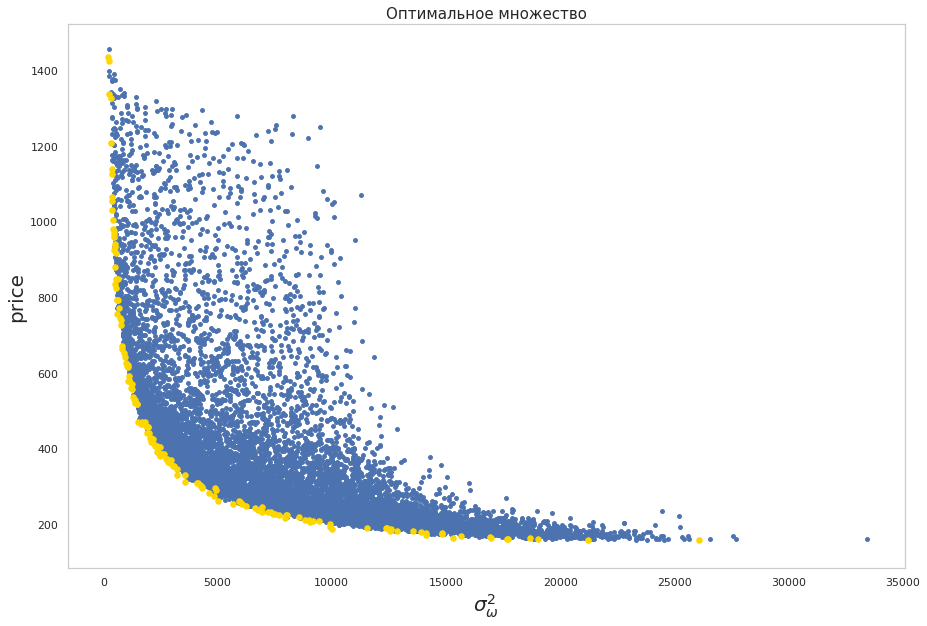

In [43]:
s_dispOmegas = [p[1][0] for p in s_data_RLC]
s_prices = [p[1][1] for p in s_data_RLC]
plt.figure(figsize=(15, 10))
plt.title('Оптимальное множество', size=15)
plt.scatter(dispOmegas, prices, s=15)
plt.scatter(s_dispOmegas, s_prices, s=30, color='gold')
plt.xlabel(r'$\sigma_{\omega}^2$', size=20)
plt.ylabel('price', size=20)
plt.grid()
plt.show()

In [44]:
print('--- СПИСОК ОПТИМАЛЬНЫХ КОНФИГУРАЦИЙ ---')
for point, res in s_data_RLC:
    print('Оптимальная конфигурация 6R = {:.2}, 6C = {:.2}, 6L = {:.2}: 6^2w = {:.3}, P = {:.3f}'.format(*point, *res))

--- СПИСОК ОПТИМАЛЬНЫХ КОНФИГУРАЦИЙ ---
Оптимальная конфигурация 6R = 3.1, 6C = 2.1e-07, 6L = 0.0024: 6^2w = 2.27e+02, P = 1433.515
Оптимальная конфигурация 6R = 2.9, 6C = 2.1e-07, 6L = 0.0024: 6^2w = 2.49e+02, P = 1423.312
Оптимальная конфигурация 6R = 5.2, 6C = 2.3e-07, 6L = 0.0022: 6^2w = 2.53e+02, P = 1337.342
Оптимальная конфигурация 6R = 1.3, 6C = 2.2e-07, 6L = 0.003: 6^2w = 3.35e+02, P = 1325.619
Оптимальная конфигурация 6R = 3.8, 6C = 2.5e-07, 6L = 0.0028: 6^2w = 3.43e+02, P = 1207.595
Оптимальная конфигурация 6R = 4.8, 6C = 2.8e-07, 6L = 0.003: 6^2w = 3.95e+02, P = 1063.139
Оптимальная конфигурация 6R = 5.5, 6C = 3.2e-07, 6L = 0.0028: 6^2w = 4.81e+02, P = 959.472
Оптимальная конфигурация 6R = 1.6, 6C = 3.2e-07, 6L = 0.0037: 6^2w = 5.16e+02, P = 941.026
Оптимальная конфигурация 6R = 1.3, 6C = 3.4e-07, 6L = 0.003: 6^2w = 5.22e+02, P = 933.280
Оптимальная конфигурация 6R = 4.2, 6C = 3.4e-07, 6L = 0.003: 6^2w = 5.48e+02, P = 917.607
Оптимальная конфигурация 6R = 2.5, 6C = 3.8e-07,